Use this cell for all your imports

In [23]:
!pip install networkx
!pip install matplotlib
!pip install numpy
!pip install seaborn
import networkx as net
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix
import seaborn as sns
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import eigs



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

In [24]:
# Read data from file
data_list = []
with open('data.txt', 'r') as file:
    for line in file:
        # Ignore comment lines
        if line.startswith('#'):
            continue
        # Parse line and add to list
        parts = line.strip().split()
        if len(parts) != 2:
            continue
        data_list.append((int(parts[0]), int(parts[1])))
# Create directed graph
graph = net.DiGraph(data_list)

Use this cell to normalize the matrix as you see fit.

In [25]:
# calculate the number of nodes in the graph
n_nodes = max(max(pair) for pair in data_list)


rows = [pair[0]-1 for pair in data_list]  
cols = [pair[1]-1 for pair in data_list]

# Create a sparse adjacency matrix from the row and column indices
adjacency_matrix = csr_matrix(([1]*len(data_list), (rows, cols)), shape=(n_nodes, n_nodes))

# Normalize the adjacency matrix by row sums
row_sums = np.array(adjacency_matrix.sum(axis=1)).flatten()
row_sums[row_sums == 0] = 1  # Avoid division by zero
norm_matrix = sp.diags(1/row_sums).dot(adjacency_matrix)



Apply the PageRank algorithm to the matrix you created.

In [27]:
# Calculate PageRank scores
pr_scores = net.pagerank(graph)
top_nodes = sorted(pr_scores.items(), key=lambda x: x[1], reverse=True)[:10]
for node, score in top_nodes:
    print(f"Node: {node}, Score: {score:.8f}")
    

Node: 9407087, Score: 0.00623891
Node: 9503124, Score: 0.00463259
Node: 9510017, Score: 0.00438517
Node: 9402044, Score: 0.00393535
Node: 9711200, Score: 0.00340968
Node: 9410167, Score: 0.00340737
Node: 9408099, Score: 0.00318987
Node: 9207016, Score: 0.00311386
Node: 9402002, Score: 0.00296246
Node: 9610043, Score: 0.00275290


Output a list of the 100 most important papers along with their importance

In [33]:
top_papers = sorted(pr_scores.items(), key=lambda x: x[1], reverse=True)[:100]
for paper, importance in top_papers:
    print(f"Paper: {paper}, Importance: {importance:.8f}")

Paper: 9407087, Importance: 0.00623891
Paper: 9503124, Importance: 0.00463259
Paper: 9510017, Importance: 0.00438517
Paper: 9402044, Importance: 0.00393535
Paper: 9711200, Importance: 0.00340968
Paper: 9410167, Importance: 0.00340737
Paper: 9408099, Importance: 0.00318987
Paper: 9207016, Importance: 0.00311386
Paper: 9402002, Importance: 0.00296246
Paper: 9610043, Importance: 0.00275290
Paper: 9205068, Importance: 0.00266200
Paper: 9510135, Importance: 0.00259143
Paper: 9201015, Importance: 0.00255435
Paper: 9205027, Importance: 0.00245903
Paper: 9304154, Importance: 0.00233252
Paper: 9802150, Importance: 0.00225552
Paper: 9401139, Importance: 0.00224595
Paper: 9504090, Importance: 0.00210650
Paper: 9802109, Importance: 0.00207088
Paper: 208020, Importance: 0.00206853
Paper: 9305185, Importance: 0.00204055
Paper: 9207053, Importance: 0.00199315
Paper: 9307049, Importance: 0.00188771
Paper: 9204102, Importance: 0.00185283
Paper: 9510209, Importance: 0.00180880
Paper: 9501068, Importance

Visualize your results

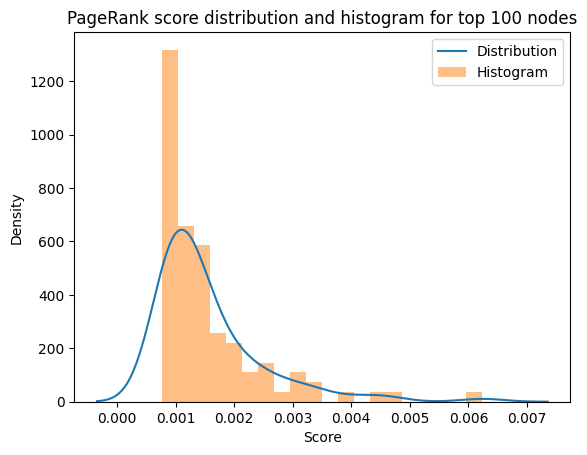

In [37]:
# Extract scores from sorted nodes
scores = [s for n, s in top_papers]

# Plot a distribution and histogram of PageRank scores
fig, ax = plt.subplots()
sns.kdeplot(scores, ax=ax, label='Distribution')
ax.hist(scores, bins=20, alpha=0.5, density=True, label='Histogram')
ax.set_xlabel('Score')
ax.set_ylabel('Density')
ax.set_title('PageRank score distribution and histogram for top 100 nodes')
ax.legend()
plt.show()


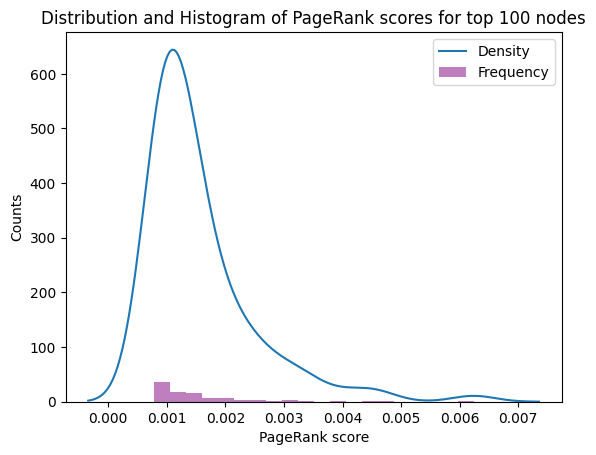

In [38]:
scores = [score for node, score in top_papers]
fig, ax = plt.subplots()
sns.kdeplot(scores, ax=ax, label='Density')
ax.hist(scores, bins=20, alpha=0.5, color='purple', label='Frequency')
ax.set_xlabel('PageRank score')
ax.set_ylabel('Counts')
ax.set_title('Distribution and Histogram of PageRank scores for top 100 nodes')
ax.legend()
plt.show()
